# TODO: 
## Em cada linha, mudar o valor de 'fireplaceflag' para True se 'fireplacecnt' for diferente de NaN ou 0.
## Como tratar dados faltantes
## Como escolher as melhores features (usar XGBoost, ver correlação entre variáveis e alvo)

# Projeto 1 da Disciplina Data Science 2019.1
# Competição do Kaggle: [Zillow Prize](https://www.kaggle.com/c/zillow-prize-1)

## Configurando ambiente

### Imports

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from sklearn.preprocessing import LabelEncoder

import missingno as msno

%matplotlib inline

### Lendo versão 2016 dos arquivos CSV

In [67]:
train = pd.read_csv('Database/train_2016_v2.csv', header=0, sep=',', quotechar='"')
train_cols = train.columns.tolist()

props = pd.read_csv('Database/props_2016.csv', header=0, sep=',', quotechar='"')
props_cols = props.columns.tolist()

C:\Users\Thiago\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Fazendo o merge de dataframes properties e train (LEFT JOIN)

In [68]:
#props = pd.merge(props, train, on='parcelid', how='left')
#merged = props
merged = pd.merge(props, train, on='parcelid', how='left')

## 2. Pré-processamento dos dados

In [69]:
props.head().transpose()

,0,1,2,3,4
parcelid,10754147,10759547,10843547,10859147,10879947
airconditioningtypeid,NaN,NaN,NaN,NaN,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN
bathroomcnt,0,0,0,0,0
bedroomcnt,0,0,0,0,0
buildingclasstypeid,NaN,NaN,NaN,3,4
buildingqualitytypeid,NaN,NaN,NaN,7,NaN
calculatedbathnbr,NaN,NaN,NaN,NaN,NaN
decktypeid,NaN,NaN,NaN,NaN,NaN


In [70]:
props.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parcelid,2985217.0,1.332586e+07,7.909966e+06,1.071172e+07,1.164371e+07,1.254509e+07,1.409712e+07,1.696019e+08
airconditioningtypeid,811519.0,1.931166e+00,3.148587e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,6061.0,7.202607e+00,2.436290e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.700000e+01
basementsqft,1628.0,6.468833e+02,5.387935e+02,2.000000e+01,2.720000e+02,5.340000e+02,8.472500e+02,8.516000e+03
bathroomcnt,2973755.0,2.209143e+00,1.077754e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
bedroomcnt,2973767.0,3.088949e+00,1.275859e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,2.000000e+01
buildingclasstypeid,12629.0,3.725948e+00,5.017002e-01,1.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
buildingqualitytypeid,1938488.0,5.784787e+00,1.805352e+00,1.000000e+00,4.000000e+00,7.000000e+00,7.000000e+00,1.200000e+01
calculatedbathnbr,2856305.0,2.299263e+00,1.000736e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
decktypeid,17096.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01


### 2.1 Definição de tipos

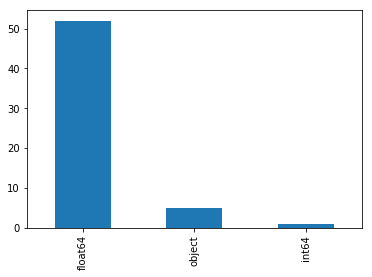

In [71]:
props.dtypes.value_counts().sort_values(ascending=False).plot.bar()

In [72]:
# Mudando colunas de tipo 'object' para tipo 'category'
object_type = props.select_dtypes(include=['object']).columns.values
props[object_type] = props[object_type].astype('category')

#Mudar tipo da coluna transaction date para 'datetime64'
if ('transactiondate' in object_type):
    props['transactiondate'] = pd.to_datetime(props['transactiondate'])

### 2.2 Tratamento de dados ausentes

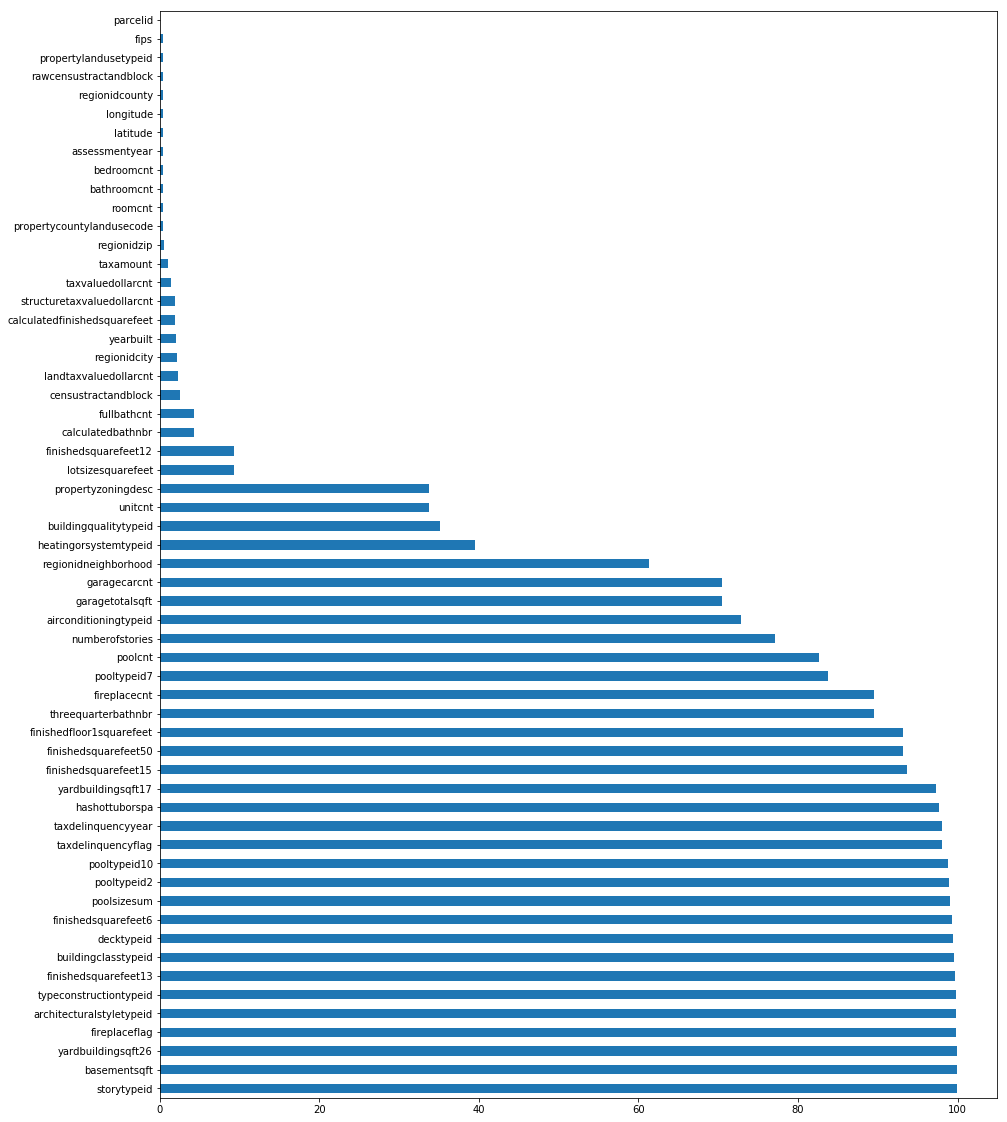

In [73]:
#Porcentagem de valores NaN em cada coluna
((props.isnull().sum()/len(props))*100).sort_values(ascending=False).plot.barh(figsize=(15,20))
#props.isnull().sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### 2.2.1 Remoção de dados

##### Não faz sentido uma casa não ter banheiro ou quarto

In [74]:
props.shape

(2985217, 58)

In [75]:
# Remover instâncias que não tem 'bathroomcnt' ou que seja igual a zero
props = props[pd.notnull(props['bathroomcnt']) | props['bathroomcnt'] != 0]

# Remover instâncias que não tem 'bedroomcnt' ou que seja igual a zero
props = props[pd.notnull(props['bedroomcnt']) | props['bedroomcnt'] != 0]

In [76]:
# Remover colunas com menos de 70% de dados ausentes
props.dropna(thresh=0.70*len(props), axis=1, inplace=True)

In [77]:
props.shape

(2973755, 25)

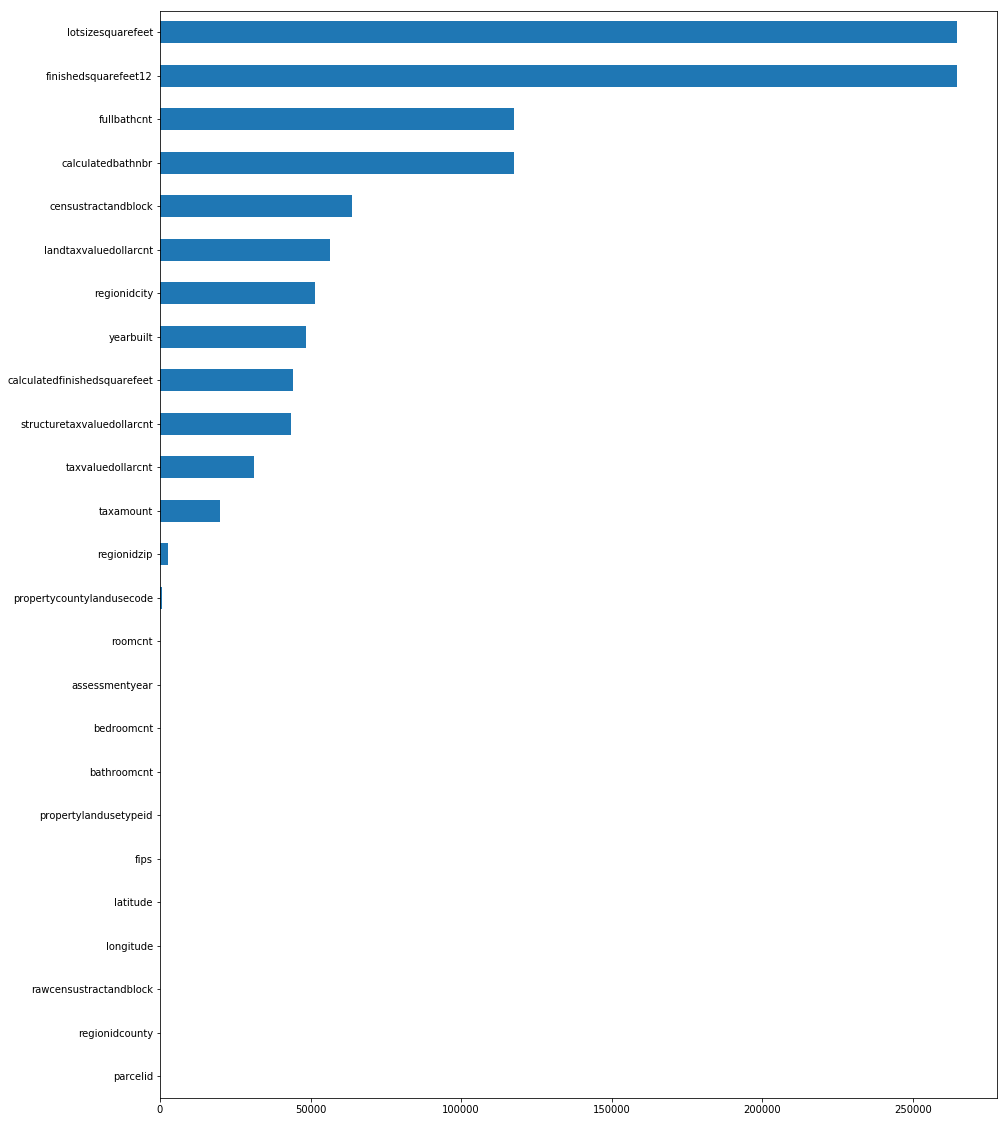

In [78]:
props.isnull().sum().sort_values().plot.barh(figsize=(15,20))

#### 2.2.2 Imputação de dados

##### Baseando-se correlação para medir algum impacto na imputação:

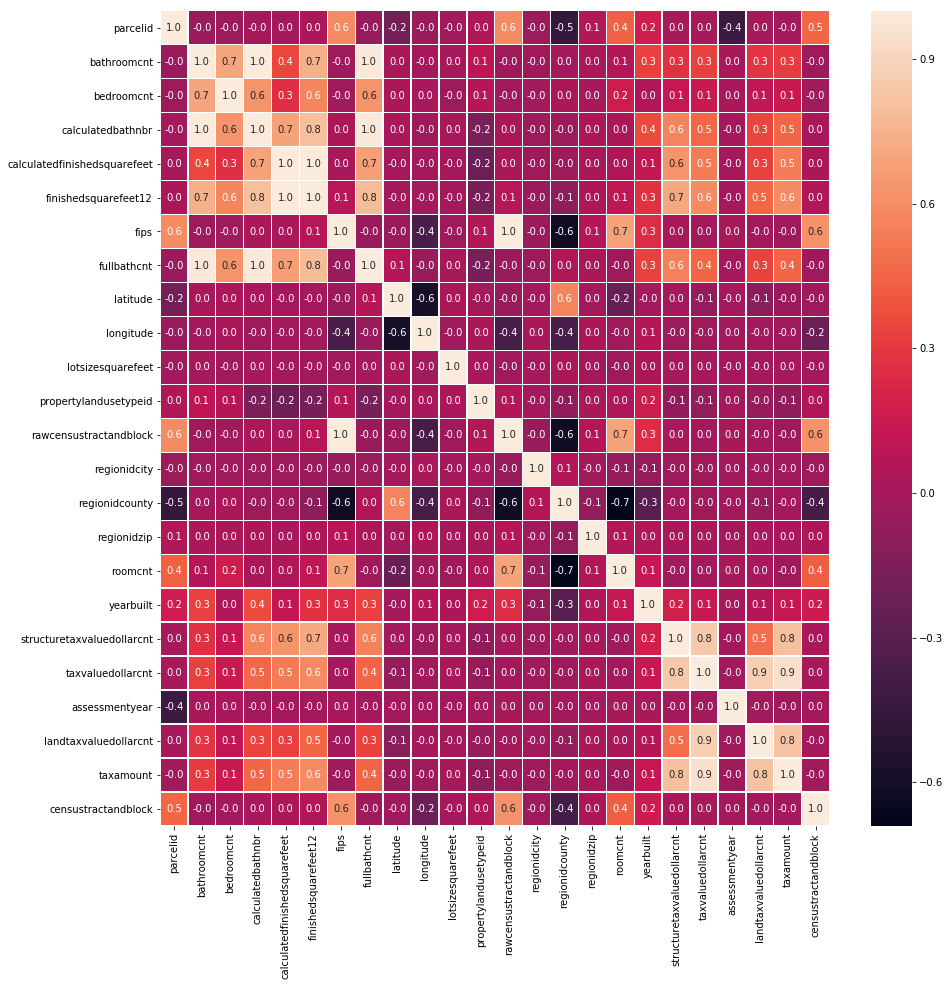

In [79]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(props.corr(), annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

##### [Dados Categóricos](https://www.datacamp.com/community/tutorials/categorical-data)

In [80]:
cat_df_props = props.select_dtypes(include=['category']).copy()

In [81]:
cat_df_props.head()

,propertycountylandusecode
0,010D
1,0109
2,1200
3,1200
4,1210


In [82]:
print(cat_df_props.isnull().values.sum())
print(cat_df_props.isnull().sum())

840
propertycountylandusecode    840
dtype: int64


In [83]:
# Não podemos usar o one hot encoder pois precisariamos criar 240 novas colunas para um dataframe com 3 mi instâncias
cat_df_props['propertycountylandusecode'].cat.categories

Index(['0', '010', '0100', '0101', '0102', '0103', '0104', '0105', '0106',
       '0108',
       ...
       '8', '84', '8800', '880V', '8830', '9000', '91', '9100', '96', 'SFR'],
      dtype='object', length=240)

In [84]:
prop_county_land_use_code = cat_df_props['propertycountylandusecode'].cat.codes
prop_county_land_use_code

0           12
1           10
2          150
3          150
4          162
5          162
6           20
7          162
8           12
9          162
10         150
11          12
12          12
13         206
14           2
15           2
16           2
17         162
18         206
19           2
20         162
21         162
22         162
23         162
24         162
25           2
26          55
27         150
28          11
29           2
          ... 
2973750    125
2973751    125
2973752    125
2973753    125
2973754    125
2973755    125
2973756    125
2973757    139
2973758     47
2973759     11
2973760     11
2973761     34
2973762    193
2973763    177
2973764      2
2973765    125
2973766     34
2973767    125
2973768    125
2973769    125
2973770    125
2973771    125
2973772    125
2973773    125
2973774     55
2973775    109
2973776     11
2973777     11
2973778     13
2973779     55
Length: 2973755, dtype: int16

In [85]:
lb_make = LabelEncoder()
cat_df_props['propertycountylandusecode'] = lb_make.fit_transform(cat_df_props['propertycountylandusecode'])


TypeError: '<' not supported between instances of 'str' and 'float'

##### Dados Numéricos

### 2.3 Normalização e discretização

#### 2.3.1 Discretização

#### 2.3.2 Normalização

### 2.4 Limpeza de dados

#### 2.4.1 Univariado

#### 2.4.2 Bivariado

#### 2.4.3 Multivariado

## Data Visualization

#### Properties Locations on Map

In [ ]:
props['latitude'] /= 1e6
props['longitude'] /= 1e6

In [ ]:
plt.figure(figsize=(12,12))
sns.jointplot(x=props.latitude.values, y=props.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [ ]:
#Save for later

#props_train = pd.merge(props, train, on='parcelid', how='left')

#msno.dendrogram(props)

# Changing type of columns with Ids to unsigned short int
#id_columns = props.filter(regex='id').columns.values
#props[id_columns].astype('uint16')